In [3]:
import pymysql

# connect to the database server
try:
    conn = pymysql.connect(
                host = '127.0.0.1',
                user = 'root',
                password = '12345',
                database= "sqllearning"
    )
    mycursor = conn.cursor()
    print("connection established")
except:
    print("connection error")

connection established


In [17]:
import pandas as pd
df = pd.read_sql_query("""
SELECT * FROM(SELECT ROW_NUMBER() OVER w as `match_number`,
SUM(batsman_run) as `runs_scored`,
AVG(SUM(batsman_run)) OVER w as `cumulative average`,
AVG(SUM(batsman_run)) OVER(ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as `rolling average`
FROM sqllearning.ipl_ball_by_ball_2008_2022
WHERE batter = "V Kohli"
GROUP BY `ID`
WINDOW w as (ORDER BY `ID`)) t1""",conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_3112\4099317417.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""


In [18]:
df

,match_number,runs_scored,cumulative average,rolling average
0,1,1.0,1.0000,1.0000
1,2,23.0,12.0000,12.0000
2,3,13.0,12.3333,12.3333
3,4,12.0,12.2500,12.2500
4,5,1.0,10.0000,10.0000
...,...,...,...,...
210,211,0.0,30.8483,16.1667
211,212,20.0,30.7972,19.5000
212,213,73.0,30.9953,31.6667
213,214,25.0,30.9673,34.3333


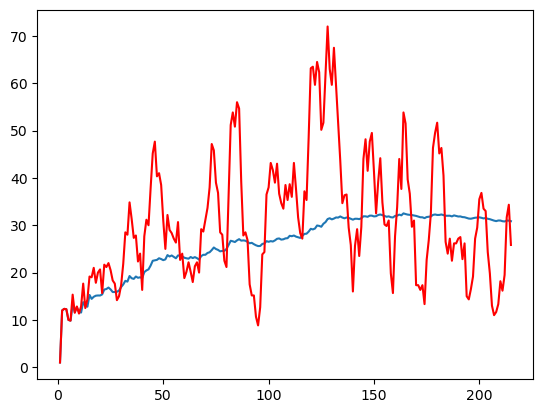

In [19]:
import matplotlib.pyplot as plt
plt.plot(df['match_number'],df['cumulative average'])
plt.plot(df['match_number'],df['rolling average'],color = 'r')